# Examining artist diversity in MoMA's collection 
In 1985, seven women banded together to form the Guerilla Girls, a feminist art group devoted to combating sexism and racism in the art world. The group -- which became known for donning gorilla masks in public -- [launched in response to MoMA's 1984 exhibition "An International Survey of Recent Painting and Sculpture,"](https://www.guerrillagirls.com/thanks-moma/) which featured 152 male artists and only 13 female artists. Over three decades later, how much has changed? Has MoMA made a noticeable effort to diversify its collection? How has the gender distribution of MoMA accessions changed over time?

### Data sourcing and cleaning
I found my dataset by Googling "MoMA collection csv." The first hit was MoMA's GitHub, which conveniently had the entire collection in CSV form. 

Less conveniently, the "Gender" column was (and still is) a mess, with 374 different genders. That's because groups of artists and collaborative works are labeled in the order of the artists from the "Artist" column. "Male, Male, Female" for example -- or "(Male) (Male) (Female) (Male) (Male) (Male) (Male) (Female) (Male) (Male) () (Male) (Male) (Male) ()     ". The empty parentheses typically mean companies, brands, or anonymous artist groups and collectives. I decided to focus on individual artists, which make up just over 88% of the collection.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline 

In [3]:
df = pd.read_csv('MoMA_Artworks.csv')
df.shape

(134672, 29)

In [4]:
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [5]:
df.dtypes

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ThumbnailURL           object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object

In [6]:
df.Gender.value_counts()

(Male)                                                                                                                                                                                                 102062
(Female)                                                                                                                                                                                                17009
()                                                                                                                                                                                                       6850
(Male) (Male)                                                                                                                                                                                            1776
(Male) (Male) (Male)                                                                                                                                                            

In [7]:
df.groupby('Gender').count().shape # yikes

(378, 28)

In [8]:
#Looking into what the empty parentheses in some gender categorizations mean
pd.options.display.max_colwidth = 100
df[df['Gender']=='(Male) ()'].head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
1045,Enkavent Radon Control Matting,"George Dodson, Akzo Nobel Geosynthetics Company, Asheville, NC","26171, 9216",NaN,() (American),(0) (0),(0) (0),(Male) (),c. 1985,Nylon and polyester,...,http://www.moma.org/media/W1siZiIsIjYyMzM1Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZS...,NaN,1.900,NaN,182.90,NaN,NaN,52.0000,NaN,NaN
1391,Vase,"Louis Comfort Tiffany, Tiffany Studios, New York, NY","5876, 8999","(American, 1848–1933)",(American) (),(1848) (0),(1933) (0),(Male) (),c. 1900,Favrile glass,...,http://www.moma.org/media/W1siZiIsIjIyODA3MyJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,15.2,41.20,NaN,NaN,NaN,NaN,NaN
1469,Table Lamp,"Louis Majorelle, Daum Frères, Nancy, France","3701, 9682","(French, 1859–1926) (French, established 1875)",(French) (French),(1859) (1875),(1926) (0),(Male) (),c. 1900,Gilt and patinated bronze and acid-etched glass,...,http://www.moma.org/media/W1siZiIsIjIxMDMwNSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,Candleholder,"Christopher Dresser, Hukin & Heath, Birmingham, England","1616, 10998","(British, 1834–1904)",(British) (),(1834) (0),(1904) (0),(Male) (),c. 1880,Electroplated silver and ebony,...,http://www.moma.org/media/W1siZiIsIjIyODcyMSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,13.97,NaN,NaN,NaN,NaN,NaN
1959,LIP Wastepaper Baskets,"Hans Maier-Aichen, Authentics artipresent GmbH, Germany","8003, 9980","(German, born 1940) (established 1981)",(German) (),(1940) (1981),(0) (0),(Male) (),1993,Injection-molded polypropylene,...,http://www.moma.org/media/W1siZiIsIjMxNTYyNCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,13.335,NaN,24.13,NaN,NaN,23.1775,NaN,NaN


In [9]:
#Looking into what the empty parentheses in some gender categorizations mean
df[df['Gender']=='() (Male)'].head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
584,"National Commercial Bank, Jeddah, Saudi Arabia (Four plans, preliminary study)","Skidmore Owings & Merrill, Gordon Bunshaft","5518, 8170","(American, founded 1936) (American, 1909–1990)",(American) (American),(1936) (1909),(0) (1990),() (Male),1977,Felt tip pen on tracing paper,...,NaN,NaN,NaN,NaN,30.4801,NaN,NaN,90.1702,NaN,NaN
586,"National Commercial Bank, Jeddah, Saudi Arabia (Three plans, preliminary study)","Skidmore Owings & Merrill, Gordon Bunshaft","5518, 8170","(American, founded 1936) (American, 1909–1990)",(American) (American),(1936) (1909),(0) (1990),() (Male),1977,Felt tip pen and colored pencil on tracing paper,...,NaN,NaN,NaN,NaN,30.4801,NaN,NaN,91.4402,NaN,NaN
588,"National Commercial Bank, Jeddah, Saudi Arabia (Five plans, preliminary study)","Skidmore Owings & Merrill, Gordon Bunshaft","5518, 8170","(American, founded 1936) (American, 1909–1990)",(American) (American),(1936) (1909),(0) (1990),() (Male),1977,Felt-tipped pen on tracing paper,...,http://www.moma.org/media/W1siZiIsIjc0MTgiXSxbInAiLCJjb252ZXJ0IiwiLXJlc2l6ZSAzMDB4MzAwXHUwMDNlIl...,NaN,NaN,NaN,30.4801,NaN,NaN,90.1702,NaN,NaN
590,"National Commercial Bank, Jeddah, Saudi Arabia (Thirteen plans, preliminary study)","Skidmore Owings & Merrill, Gordon Bunshaft","5518, 8170","(American, founded 1936) (American, 1909–1990)",(American) (American),(1936) (1909),(0) (1990),() (Male),1977,Felt-tipped pen on tracing paper,...,http://www.moma.org/media/W1siZiIsIjM0MzE1MCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,30.4801,NaN,NaN,90.8052,NaN,NaN
591,"Charrette Submission for The Museum of Modern Art Expansion 1997, New York (Manhattan), New York...","Dominique Perrault Architecture, Paris, Dominique Perrault","8053, 8052","(founded 1981) (French, born 1953)",(French) (French),(1981) (1953),(0) (0),() (Male),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN


In [10]:
#Looking into what the empty parentheses in some gender categorizations mean
df[df['Gender']=='()'].head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
605,"Charrette Submission for The Museum of Modern Art Expansion 1997, New York (Manhattan), New York...",Bernard Tschumi Architects,8057,(Swiss),(Swiss),(0),(0),(),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
608,"Charrette Submission for The Museum of Modern Art Expansion 1997, New York (Manhattan), New York...",Rafael Viñoly Architects,8805,(American),(American),(0),(0),(),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
611,"Charrette Submission for The Museum of Modern Art Expansion 1997, New York (Manhattan), New York...",Tod Williams Billie Tsien and Associates,8855,NaN,(),(0),(0),(),1997,Mixed media,...,NaN,NaN,NaN,NaN,28.0000,NaN,NaN,43.2000,NaN,NaN
871,"Offices for Willis Faber & Dumas Ltd., Ipswich, England",Foster Associates,1953,"(British, founded 1967)",(British),(1967),(0),(),1970-75,Plastic,...,http://www.moma.org/media/W1siZiIsIjIyODAyMyJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,120.3327,NaN,27.9401,NaN,NaN,95.2502,NaN,NaN
872,"Offices for Willis Faber & Dumas Ltd., Ipswich, England",Foster Associates,1953,"(British, founded 1967)",(British),(1967),(0),(),1970-75,NaN,...,NaN,NaN,162.0000,NaN,34.2901,NaN,NaN,138.4303,NaN,NaN


In [11]:
#Looking into what the empty parentheses in some gender categorizations mean
df[df['Gender']=='() ()'].head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
1012,Polystrip Flexible Cable,"A. L. Pugh, S. J. Stein","8685, 8686",(American),(American) (),(0) (0),(0) (0),() (),1957,Copper and plastic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1600,NaN,NaN
1540,Encircling Net,"Toray Industries, Inc., Tokyo, Nitto Seimo Co. Ltd., company design","9755, 22667","(Japanese, established 1926) (Japanese, established 1910)",(Japanese) (Japanese),(1926) (1910),(0) (0),() (),1996,"""TETORON"" polyester",...,http://www.moma.org/media/W1siZiIsIjIxMDM2NSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,NaN,706.1000,NaN,3.7000,NaN,NaN
1544,Tire Cord,"Toray Industries, Inc., Tokyo, Toyo Tire Cord Co. Ltd.","9755, 22668","(Japanese, established 1926) (Japanese)",(Japanese) (Japanese),(1926) (0),(0) (0),() (),c.1986–1996,Nylon-b,...,NaN,NaN,NaN,NaN,NaN,769.6215,NaN,121.9202,NaN,NaN
1551,Communications Receiver (model S-40A),"Raymond Loewy Associates, The Hallicrafters Company Design and Research Team","22548, 37063","(American, established 1944)",(American) (),(1944) (0),(0) (0),() (),1947,Steel casing,...,http://www.moma.org/media/W1siZiIsIjM0MjU3NCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,24.4475,NaN,22.5425,NaN,NaN,46.9901,NaN,NaN
2109,Multilog 2040 Pacemaker,"Per Jari, Jan Ohrn","8021, 8022","(Swedish, born 1951) (Swedish, born 1943)",(Swedish) (Swedish),(1951) (1943),(0) (0),() (),1988,Titanium and epoxy resin,...,http://www.moma.org/media/W1siZiIsIjIxMDgxMyJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,0.6000,NaN,4.1000,NaN,NaN,5.0800,NaN,NaN


In [12]:
df[df['Gender']=='() (Male) (Male) (Male) (Female) (Male) () (Male) () () (Male) (Male) (Male) (Female) (Male) () () (Male) () ()'].head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
15780,"Khudozhestvennoe oformlenie massovykh prazdnestv v Leningrade, 1918-1931","Various Artists, Leonid Akishin, Natan Al'tman, Vladimir Baranoff-Rossiné, Kseniia Boguslavskaia...","24409, 24145, 11947, 325, 23503, 24146, 24147, 23315, 24148, 24149, 23504, 23756, 12945, 24150, ...","(Russian, 1889–1971) (Ukrainian, 1888–1944) (Russian, 1892–1972) (Russian–Lithuanian, 1875–1952)...",() () (Russian) (Ukrainian) () () () () () () (Russian) () (Russian) () (Russian) () () () () (N...,(0) (0) (1889) (1888) (1892) (0) (0) (1875) (0) (0) (1891) (0) (1891) (0) (1861) (0) (0) (0) (0)...,(0) (0) (1971) (1944) (1972) (0) (0) (1952) (0) (0) (1967) (0) (1967) (0) (1934) (0) (0) (0) (0)...,() (Male) (Male) (Male) (Female) (Male) () (Male) () () (Male) (Male) (Male) (Female) (Male) () ...,1932,"48 photomechanical reproductions, 30 of works in various mediums by various artists (2 by Sarra-...",...,NaN,NaN,NaN,NaN,14.8,NaN,NaN,10.4,NaN,NaN
113300,"Booklet from Khudozhestvennoe oformlenie massovykh prazdnestv v Leningrade, 1918-1931","Various Artists, Leonid Akishin, Natan Al'tman, Vladimir Baranoff-Rossiné, Kseniia Boguslavskaia...","24409, 24145, 11947, 325, 23503, 24146, 24147, 23315, 24148, 24149, 23504, 23756, 12945, 24150, ...","(Russian, 1889–1971) (Ukrainian, 1888–1944) (Russian, 1892–1972) (Russian–Lithuanian, 1875–1952)...",() () (Russian) (Ukrainian) () () () () () () (Russian) () (Russian) () (Russian) () () () () (N...,(0) (0) (1889) (1888) (1892) (0) (0) (1875) (0) (0) (1891) (0) (1891) (0) (1861) (0) (0) (0) (0)...,(0) (0) (1971) (1944) (1972) (0) (0) (1952) (0) (0) (1967) (0) (1967) (0) (1934) (0) (0) (0) (0)...,() (Male) (Male) (Male) (Female) (Male) () (Male) () () (Male) (Male) (Male) (Female) (Male) () ...,1932,Booklet,...,NaN,NaN,NaN,NaN,14.8,NaN,NaN,10.4,NaN,NaN
113301,"Plate 1 from Khudozhestvennoe oformlenie massovykh prazdnestv v Leningrade, 1918-1931","Various Artists, Leonid Akishin, Natan Al'tman, Vladimir Baranoff-Rossiné, Kseniia Boguslavskaia...","24409, 24145, 11947, 325, 23503, 24146, 24147, 23315, 24148, 24149, 23504, 23756, 12945, 24150, ...","(Russian, 1889–1971) (Ukrainian, 1888–1944) (Russian, 1892–1972) (Russian–Lithuanian, 1875–1952)...",() () (Russian) (Ukrainian) () () () () () () (Russian) () (Russian) () (Russian) () () () () (N...,(0) (0) (1889) (1888) (1892) (0) (0) (1875) (0) (0) (1891) (0) (1891) (0) (1861) (0) (0) (0) (0)...,(0) (0) (1971) (1944) (1972) (0) (0) (1952) (0) (0) (1967) (0) (1967) (0) (1934) (0) (0) (0) (0)...,() (Male) (Male) (Male) (Female) (Male) () (Male) () () (Male) (Male) (Male) (Female) (Male) () ...,1932,Photomechanical reproduction,...,NaN,NaN,NaN,NaN,14.8,NaN,NaN,10.4,NaN,NaN
113302,"Plate 2 from Khudozhestvennoe oformlenie massovykh prazdnestv v Leningrade, 1918-1931","Various Artists, Leonid Akishin, Natan Al'tman, Vladimir Baranoff-Rossiné, Kseniia Boguslavskaia...","24409, 24145, 11947, 325, 23503, 24146, 24147, 23315, 24148, 24149, 23504, 23756, 12945, 24150, ...","(Russian, 1889–1971) (Ukrainian, 1888–1944) (Russian, 1892–1972) (Russian–Lithuanian, 1875–1952)...",() () (Russian) (Ukrainian) () () () () () () (Russian) () (Russian) () (Russian) () () () () (N...,(0) (0) (1889) (1888) (1892) (0) (0) (1875) (0) (0) (1891) (0) (1891) (0) (1861) (0) (0) (0) (0)...,(0) (0) (1971) (1944) (1972) (0) (0) (1952) (0) (0) (1967) (0) (1967) (0) (1934) (0) (0) (0) (0)...,() (Male) (Male) (Male) (Female) (Male) () (Male) () () (Male) (Male) (Male) (Female) (Male) () ...,1932,Photomechanical reproduction,...,NaN,NaN,NaN,NaN,14.8,NaN,NaN,10.4,NaN,NaN
113303,"Plate 3 from Khudozhestvennoe oformlenie massovykh prazdnestv v Leningrade, 1918-1931","Various Artists, Leonid Akishin, Natan Al'tman, Vladimir Baranoff-Rossiné, Kseniia Boguslavskaia...","24409, 24145

In [13]:
#Checking for nulls
df.Gender.isnull().sum()

1440

In [14]:
#Taking a look at what artworks have null values for gender
df[df.Gender.isnull()]

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
1234,Child's Chair (model 103),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1929–1936,Laminated birch and lacquered molded plywood,...,NaN,NaN,40.6401,NaN,60.4000,NaN,NaN,34.607600,NaN,NaN
1930,Bread Knife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,31.1000,NaN,2.857506,NaN,NaN
1940,Combination Meat Chopper and Tenderizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel and wood,...,NaN,NaN,NaN,NaN,NaN,27.3000,NaN,5.397511,NaN,NaN
3358,Kitchen Scoop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Stainless steel,...,NaN,NaN,NaN,13.9700,NaN,33.0201,NaN,NaN,NaN,NaN
3364,12-Cut Pie Marker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950s,Cast aluminum,...,NaN,NaN,NaN,24.4475,6.3500,NaN,NaN,NaN,NaN,NaN
3681,Electric Toothbrush (model TB-1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,c. 1967,Plastic casing,...,NaN,NaN,NaN,4.1275,22.5425,NaN,NaN,NaN,NaN,NaN
4180,Big Time at Belmont!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962,Offset lithograph,...,NaN,NaN,NaN,NaN,114.3000,NaN,NaN,124.400000,NaN,NaN
4947,Demnächst.....Merkur in neuer bunter Vielfalt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,Offset lithograph,...,NaN,NaN,NaN,NaN,83.8000,NaN,NaN,118.100000,NaN,NaN
4948,Demnächst.....Merkur in neuer bunter Vielfalt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,Offset lithograph,...,NaN,NaN,NaN,NaN,83.8000,NaN,NaN,118.100000,NaN,NaN
4950,Demnächst.....Merkur in neuer bunter Vielfalt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,Offset lithograph,...,NaN,NaN,NaN,NaN,83.8000,NaN,NaN,118.100000,NaN,NaN


In [15]:
# Cleaning up the Gender column
# Focusing on invidual artists and some duos/groups for now, rather than companies/large collaborations
df.Gender.replace("(Male)", "Male", inplace=True)
df.Gender.replace("(Female)", "Female", inplace=True)
# df.Gender.replace("(Male) (Male)", "Male Duo/Group", inplace=True)
# df.Gender.replace("(Female) (Female)", "Female Duo/Group", inplace=True)
# df.Gender.replace("(Male) (Male) (Male)", "Male Duo/Group", inplace=True)
# df.Gender.replace("(Female) (Female) (Female)", "Female Duo/Group", inplace=True)
# df.Gender.replace("(Male) (Male) (Male) (Male)", "Male Duo/Group", inplace=True)
#df.Gender.replace("(Female) (Female) (Female) (Female)", "Female Duo/Group", inplace=True) # doesn't exist

In [16]:
# More cleaning
# df.Gender.replace("(Male) (Female)", "Coed Duo/Group", inplace=True)
# df.Gender.replace("(Female) (Male)", "Coed Duo/Group", inplace=True)

In [17]:
#df.Gender.value_counts()

In [18]:
df.Gender.value_counts(normalize=True).head()

Male                    0.766047
Female                  0.127665
()                      0.051414
(Male) (Male)           0.013330
(Male) (Male) (Male)    0.006785
Name: Gender, dtype: float64

In [19]:
# How many times do female artists appear in the collection total? (individuals, groups, etc)
df.Gender.str.contains('Female').value_counts().reset_index()

,index,Gender
0,False,113616
1,True,19616


In [20]:
# How many times do female artists appear in the collection total? (indviduals, groups, etc)
df.Gender.str.contains('Male').value_counts().reset_index()

,index,Gender
0,True,108900
1,False,24332


In [26]:
# create a new column of how many male artists contributed to each work
df['males'] = df.Gender.str.count('Male')

In [27]:
# create a new column of how many male artists contributed to each work
df['females'] = df.Gender.str.count('Female')

In [43]:
df_resampled = df.resample('A', on='DateAcquired').sum()

In [44]:
df_resampled['mf_ratio'] = df_resampled.females / (df_resampled.males + df_resampled.females) * 100

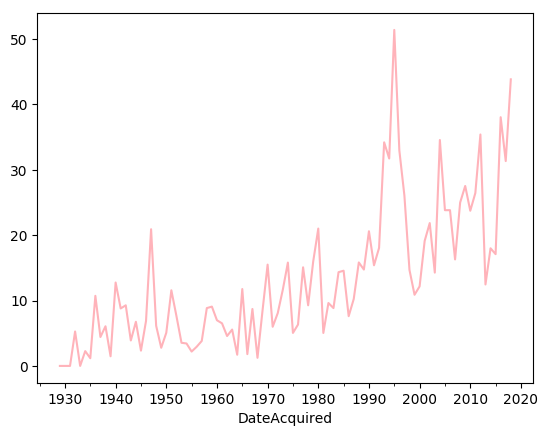

In [47]:
df_resampled.mf_ratio.plot()
plt.show()

In [20]:
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),males,females
0,"Ferdinandsbrücke Project, Vienna, Austria, Elevation, preliminary version",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),Male,1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,1.0,0.0
1,"City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from inter...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),Male,1987,Paint and colored pencil on print,...,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,1.0,0.0
2,"Villa near Vienna Project, Outside Vienna, Austria, Elevation",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),Male,1903,"Graphite, pen, color pencil, ink, and gouache on tracing paper",...,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1.0,0.0
3,"The Manhattan Transcripts Project, New York, New York, Introductory panel to Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),Male,1980,Photographic reproduction with colored synthetic laminate,...,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,1.0,0.0
4,"Villa, project, outside Vienna, Austria, Exterior perspective",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),Male,1903,"Graphite, color pencil, ink, and gouache on tracing paper",...,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1.0,0.0


In [30]:
# Focus on individual artists for now
((102062 + 17009) / 134672) * 100 #individual artists represent 88.4% of the MoMA's collection

88.4155577996911

In [31]:
# Look at art accessioned after 1984, when the Guerilla Girls protest at MoMA took place
pd.set_option('display.max_columns', None)
df['DateAcquired'] = pd.to_datetime(df['DateAcquired'], errors='coerce') 
# a couple of dates are erroneous, and some are nulls


In [32]:
df_post1984 = df[df.DateAcquired > '1984-12-31']

In [33]:
df_post1984.sort_values(by=['DateAcquired'])

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),males,females
93469,Marcia Baila,"Philippe Gautier, Les Rita Mitsouko","34891, 40429","(Fred Chichin, French, 1954–2007 and Catherine Ringer, French, born 1957)",() (French),(0) (1954),(0) (2007),(Male) (),1985,"Video (color, sound)",5:30 min.,Gift of Virgin Records,481.1985,Video,Media and Performance Art,1985-01-01,Y,118256,http://www.moma.org/collection/works/118256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0,1.0,0.0
93467,Frankie Teardrop,"Walter Robinson, Paul Dougherty, Edit DeAk","4965, 34886, 37306","(American, born 1950) (American, born 1953) (American, born Hungary (1948-2017))",(American) (American) (American),(1950) (1953) (1948),(0) (0) (2017),(Male) (Male) (Female),1978,"Video (color, sound)",10:25 min.,Gift of Red Star Records,491.1985,Video,Media and Performance Art,1985-01-02,Y,118254,http://www.moma.org/collection/works/118254,http://www.moma.org/media/W1siZiIsIjIzNTExNCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,625.0,2.0,1.0
70059,Dynamic Figure from On New Systems in Art (O Novykh Sistemakh V Iskusstve),Kazimir Malevich,3710,"(Russian, born Ukraine. 1878–1935)",(Russian),(1878),(1935),Male,1911,Lithograph,"Composition (irreg.): 7 5/16 x 3 7/8"" (18.6 x 9.9 cm)\r\nPage: 9 1/16 x 6 3/4"" (23 x 17.2 cm)",Gift of The Riklis Collection of McCrory Corporation,981.1983.2,Print,Prints & Illustrated Books,1985-01-07,Y,75056,http://www.moma.org/collection/works/75056,http://www.moma.org/media/W1siZiIsIjIyNDM1NyJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,18.600000,NaN,NaN,9.900000,NaN,NaN,1.0,0.0
56239,Plunge Into Infinity: Plate IV for Der Rebell (Der Sturz in die Unendlichkeit: Blatt IV zur Der ...,Walter Gramatté,2288,"(German, 1897–1929)",(German),(1897),(1929),Male,1918,Drypoint,"plate: 6 13/16 x 5 1/8"" (17.3 x 13 cm); sheet (irreg.): 15 3/8 x 11 5/16"" (39 x 28.7 cm)",The Philip and Lynn Straus Foundation Fund,11.1985,Print,Prints & Illustrated Books,1985-01-30,Y,59844,http://www.moma.org/collection/works/59844,http://www.moma.org/media/W1siZiIsIjExOTMyOCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,17.300000,NaN,NaN,13.000000,NaN,NaN,1.0,0.0
9502,Plate (folio 15) from EN BAS,Wolfgang Gäfgen,2046,"(German, born 1936)",(German),(1936),(0),Male,1984,"Aquatint, printed in black","plate 6 5/8 x 7 13/16"" (16.8 x 19.9 cm)",Gift of the Rosengarten Foundation,35.1985.9,Illustrated Book,Prints & Illustrated Books,1985-01-30,N,10567,NaN,NaN,NaN,NaN,NaN,16.800000,NaN,NaN,19.900000,NaN,NaN,1.0,0.0
9501,Plate (folio 14) from EN BAS,Wolfgang Gäfgen,2046,"(German, born 1936)",(German),(1936),(0),Male,1984,"Soft ground etching, printed in black","plate 6 5/8 x 7 13/16"" (16.8 x 19.9 cm)",Gift of the Rosengarten Foundation,35.1985.8,Illustrated Book,Prints & Illustrated Books,1985-01-30,N,10566,NaN,NaN,NaN,NaN,NaN,16.800000,NaN,NaN,19.900000,NaN,NaN,1.0,0.0
9500,Plate (folio 13) from EN BAS,Wolfgang Gäfgen,2046,"(German, born 1936)",(German),(1936),(0),Male,1984,"Aquatint and soft ground etching, printed in black","plate 6 5/8 x 7 13/16"" (16.8 x 19.9 cm)",Gift of the Rosengarten Foundation,35.1985.7,Illustrated Book,Prints & Illustrated Books,1985-01-30,N,10565,NaN,NaN,NaN,NaN,NaN,16.800000,NaN,NaN,19.900000,NaN,NaN,1.0,0.0
9499,Plate (folio 12) from EN BAS,Wolfgang Gäfgen,2046,"(German, born 1936)",(German),(1936),(0),Male,1984,"Soft ground etching, and drypoint with roulette printed in black","plate 7 13/16 x 9"" (19.8 x 22.9 cm)",Gift of the Rosengarten Foundation,35.1985.6,Illustrated Book,Prints & Illustrated Books,1985-01-30,N,10564,NaN,NaN,NaN,NaN,NaN,19.800000,NaN,NaN,22.900000,NaN,NaN,1.0,0.0
9498,Plate (folio 1

In [34]:
df_post1984.Gender.value_counts(normalize=True)

Male                                                                                                                                                                                                                                                                                                                                                                  0.649401
Female                                                                                                                                                                                                                                                                                                                                                                0.190946
()                                                                                                                                                                                                                                                                        

In [35]:
# For comparison, what about accessions prior to 1985?
df_pre1984 = df[df.DateAcquired < '1984-12-31']
df_pre1984.Gender.value_counts(normalize=True).head() * 100

Male             88.619817
Female            6.111551
()                3.275431
(Male) (Male)     0.993496
(Male) ()         0.201804
Name: Gender, dtype: float64

In [36]:
# What about the last decade?
df_lastdecade = df[df.DateAcquired > '2007-12-31']
df_lastdecade.sort_values(by=['DateAcquired']).head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),males,females
132526,Four Saints in Three Acts,Julien Levy,3522,"(American, 1906–1981)",(American),(1906),(1981),Male,1934,NaN,NaN,NaN,77109,Film,Film,2008-01-31,N,274904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
92314,Table Chair,Richard Hutten,34174,"(Dutch, born 1967)",(Dutch),(1967),(0),Male,1990,Maple and MDF,"29 1/2 x 23 5/8 x 22 13/16"" (75 x 60 x 58 cm)",Gift of Jan Christiaan Braun in honor of Ronald S. Lauder,22.2008.a-b,Design,Architecture & Design,2008-02-06,Y,113408,http://www.moma.org/collection/works/113408,http://www.moma.org/media/W1siZiIsIjE1Nzk4NiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,58.0,NaN,75.000000,NaN,NaN,60.000000,NaN,NaN,1.0,0.0
93021,"Jazz in Willisau:, Anthony Braxton Quartet",Niklaus Troxler,5940,"(Swiss, born 1947)",(Swiss),(1947),(0),Male,1991,Silkscreen,"35 5/8 x 50 3/8"" (90.5 x 128 cm)",Gift of the designer,477.2008,Design,Architecture & Design,2008-02-06,Y,116800,http://www.moma.org/collection/works/116800,http://www.moma.org/media/W1siZiIsIjE1OTA0MiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,90.487681,NaN,NaN,127.952756,NaN,NaN,1.0,0.0
93020,Jazz Festival Willisau '76,Niklaus Troxler,5940,"(Swiss, born 1947)",(Swiss),(1947),(0),Male,1976,Silkscreen,"35 5/8 x 50 3/8"" (90.5 x 128 cm)",Gift of the designer,474.2008,Design,Architecture & Design,2008-02-06,Y,116799,http://www.moma.org/collection/works/116799,http://www.moma.org/media/W1siZiIsIjE1OTA0NSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,90.487681,NaN,NaN,127.952756,NaN,NaN,1.0,0.0
92657,"Esquire Magazine, Issue no. 424, March 1969",George Lois,34411,"(American, born 1931)",(American),(1931),(0),(),1969,Offset lithography,"13 3/16 x 10 1/4"" (33.5 x 26 cm)",Doug Lloyd Purchase Fund,50.2008,Design,Architecture & Design,2008-02-06,Y,114814,http://www.moma.org/collection/works/114814,http://www.moma.org/media/W1siZiIsIjE3MTQ0MyJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2...,NaN,NaN,NaN,33.500000,NaN,NaN,26.000000,NaN,NaN,0.0,0.0


In [37]:
df_lastdecade.Gender.value_counts(normalize=True).head() * 100

Male                    59.715672
Female                  20.321124
()                       8.225456
(Male) (Male)            2.281318
(Male) (Male) (Male)     2.277973
Name: Gender, dtype: float64

In [38]:
#some styling stuff -- will restyle everything in illustrator, though
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff'])
})

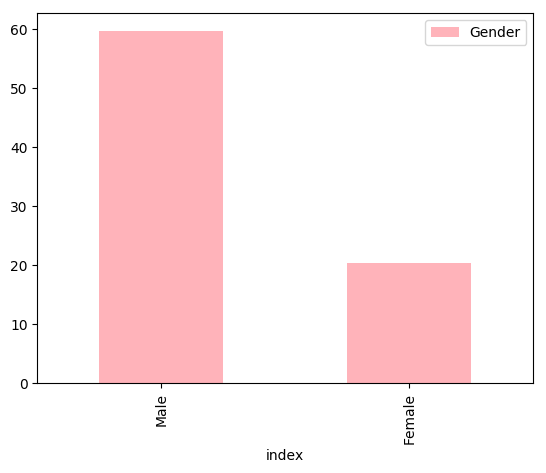

In [41]:
df_lastdecade2 = (df_lastdecade.Gender.value_counts(normalize=True) * 100).reset_index()
df_lastdecade2.head(2).plot(kind='bar', x='index')
plt.show()

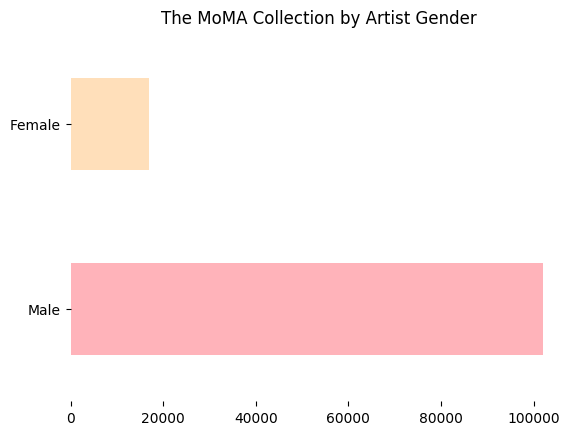

In [238]:
# Plot the Male:Female artist ratio in the entire MoMA collection 
# (note that this only represents individual artists -- 88% of the collection)

ax = df.Gender.value_counts().head(2).plot(kind='barh', title='The MoMA Collection by Artist Gender')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

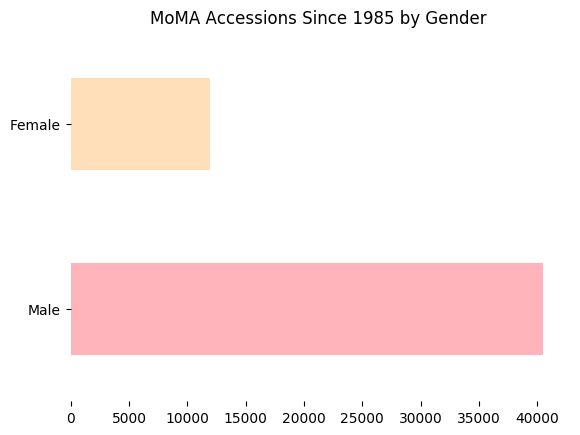

In [234]:
# Plot the Male:Female artist ratio in MoMA accessions since Jan 1985
ax = df_post1984.Gender.value_counts().head(2).plot(kind='barh', title='MoMA Accessions Since 1985 by Gender')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

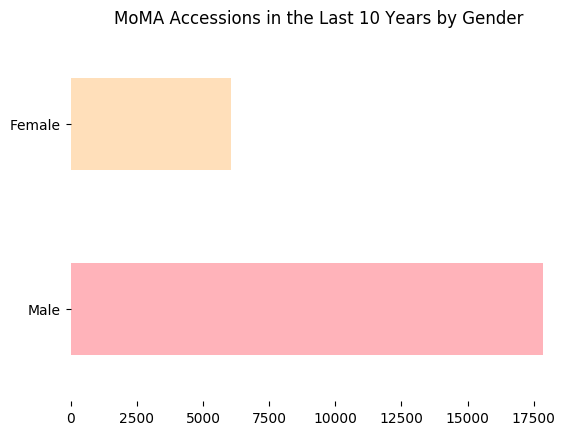

In [239]:
# Plot the Male:Female artist ratio in MoMA accessions in the last decade
ax = df_lastdecade.Gender.value_counts().head(2).plot(kind='barh', title='MoMA Accessions in the Last 10 Years by Gender')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

In [274]:
# more bar charts of gender splits in acquisitions -- by decade -- since MoMA's 1929 inception
# this time, by percentages rather than number of works
# same scale, for potential animating in photoshop later


df_30s = df[(df.DateAcquired > '1930-01-01') & (df.DateAcquired < '1939-12-31') & (df['Gender'] != '()')]
df_40s = df[(df.DateAcquired > '1940-01-01') & (df.DateAcquired < '1949-12-31') & (df['Gender'] != '()')]
df_50s = df[(df.DateAcquired > '1950-01-01') & (df.DateAcquired < '1959-12-31') & (df['Gender'] != '()')]
df_60s = df[(df.DateAcquired > '1960-01-01') & (df.DateAcquired < '1969-12-31')]
df_70s = df[(df.DateAcquired > '1970-01-01') & (df.DateAcquired < '1979-12-31')]
df_80s = df[(df.DateAcquired > '1980-01-01') & (df.DateAcquired < '1989-12-31')]
df_90s = df[(df.DateAcquired > '1990-01-01') & (df.DateAcquired < '1999-12-31')]
df_00s = df[(df.DateAcquired > '2000-01-01') & (df.DateAcquired < '2009-12-31')]
df_2010s = df[(df.DateAcquired > '2010-01-01') & (df.DateAcquired < '2019-12-31')]

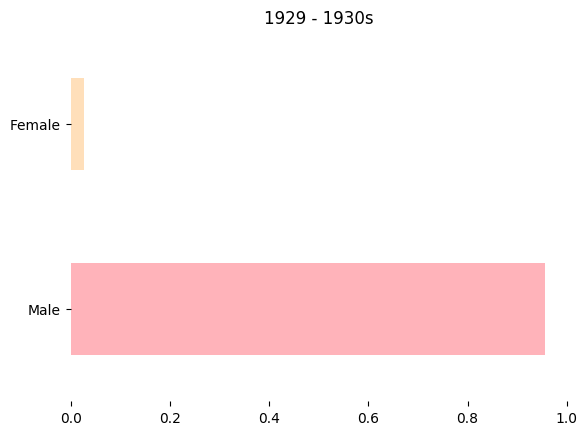

In [316]:
#1930s 
ax = df_30s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1929 - 1930s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("30s.png")

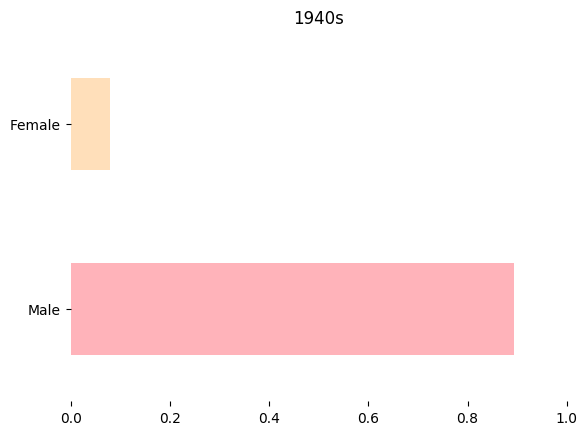

In [299]:
#1940s 
ax = df_40s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1940s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("40s.png")

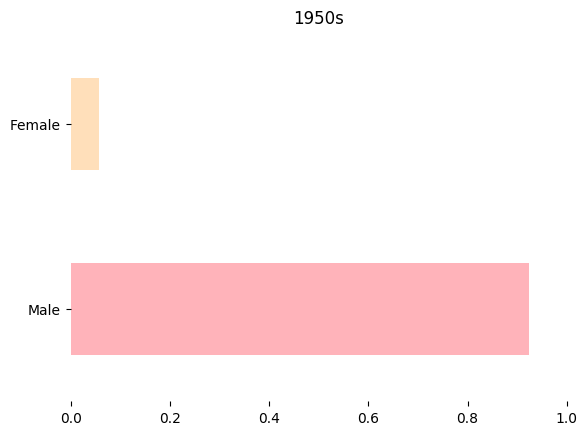

In [300]:
#1950s 
ax = df_50s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1950s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("50s.png")

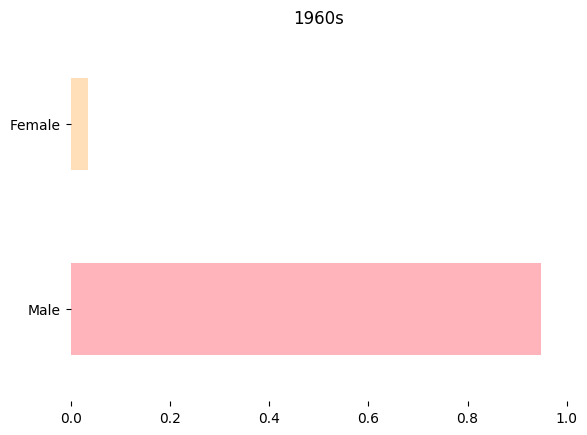

In [301]:
#1960s 
ax = df_60s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1960s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("60s.png")

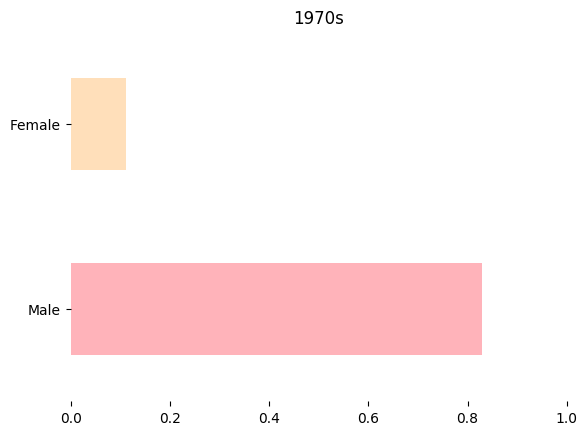

In [302]:
#1970s 
ax = df_70s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1970s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("70s.png")

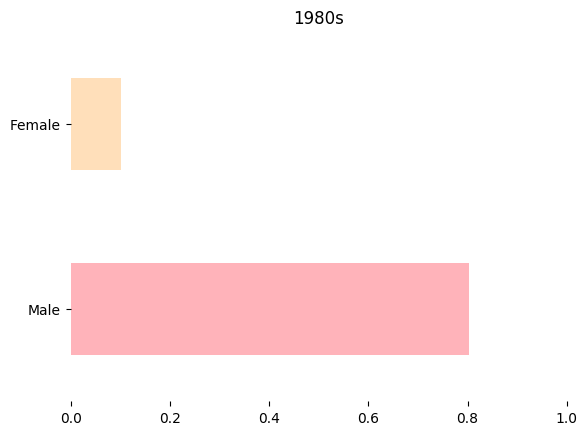

In [303]:
#1980s 
ax = df_80s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1980s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("80s.png")

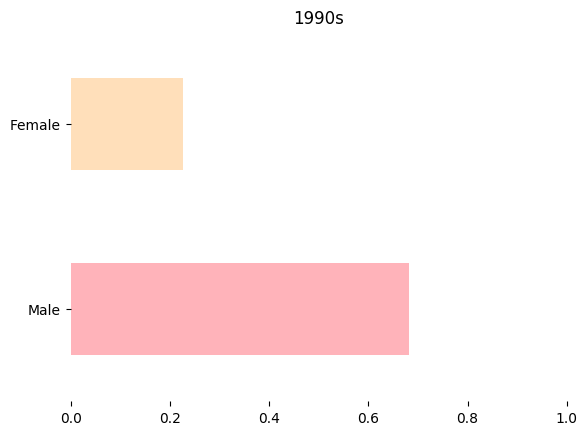

In [304]:
#1990s 
ax = df_90s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1990s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("90s.png")

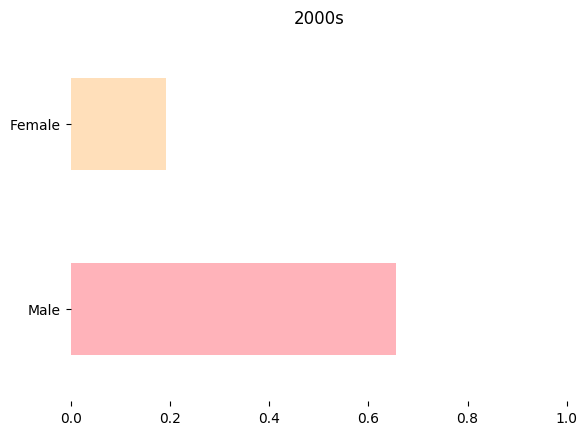

In [305]:
#2000s 
ax = df_00s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="2000s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("2000s.png")

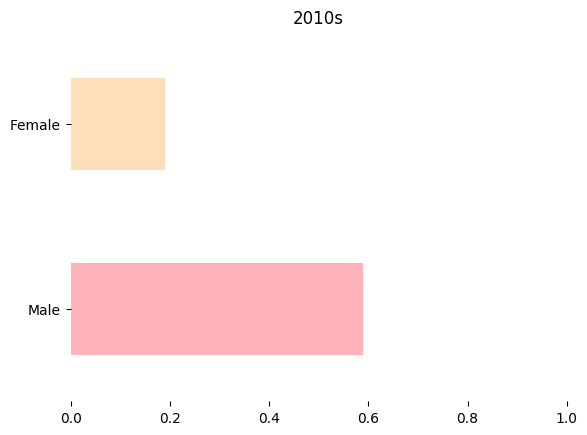

In [306]:
#2010s 
ax = df_2010s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="2010s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("2010s.png")

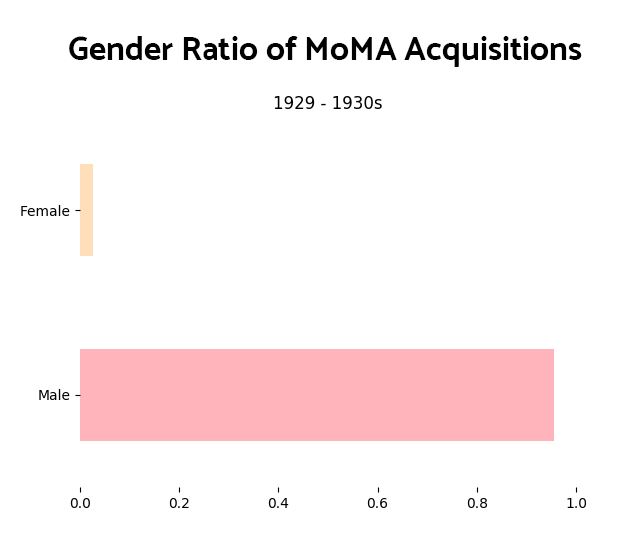

In [354]:
df_ind = df[(df.Gender=='Male') | (df.Gender=='Female')]

df_ind_30s = df_ind[(df_ind.DateAcquired > '1930-01-01') & (df_ind.DateAcquired < '1939-12-31')]
df_ind_40s = df_ind[(df_ind.DateAcquired > '1940-01-01') & (df_ind.DateAcquired < '1949-12-31')]
df_ind_50s = df_ind[(df_ind.DateAcquired > '1950-01-01') & (df_ind.DateAcquired < '1959-12-31')]
df_ind_60s = df_ind[(df_ind.DateAcquired > '1960-01-01') & (df_ind.DateAcquired < '1969-12-31')]
df_ind_70s = df_ind[(df_ind.DateAcquired > '1970-01-01') & (df_ind.DateAcquired < '1979-12-31')]
df_ind_80s = df_ind[(df_ind.DateAcquired > '1980-01-01') & (df_ind.DateAcquired < '1989-12-31')]
df_ind_90s = df_ind[(df_ind.DateAcquired > '1990-01-01') & (df_ind.DateAcquired < '1999-12-31')]
df_ind_00s = df_ind[(df_ind.DateAcquired > '2000-01-01') & (df_ind.DateAcquired < '2009-12-31')]
df_ind_2010s = df_ind[(df_ind.DateAcquired > '2010-01-01') & (df_ind.DateAcquired < '2019-12-31')]


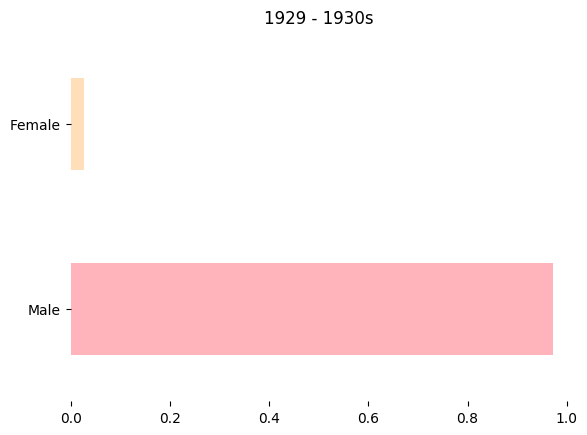

In [359]:
# 30s individual artists
ax = df_ind_30s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1929 - 1930s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("30s_ind.png")

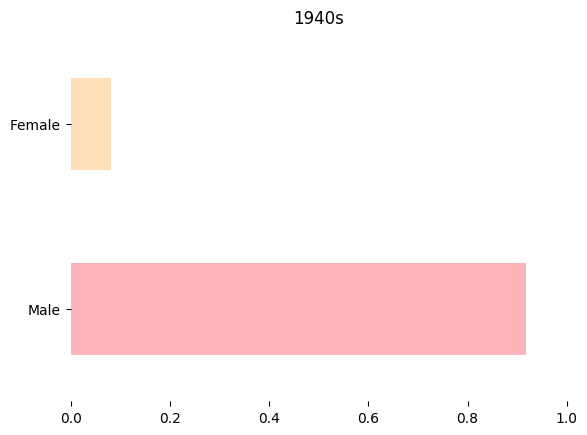

In [361]:
# 40s individual artists

ax = df_ind_40s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1940s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("40s_ind.png")

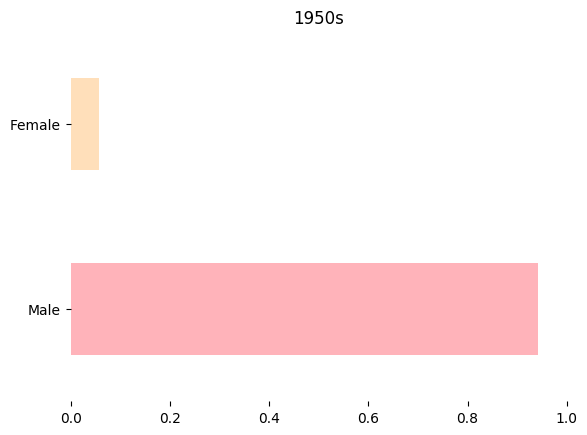

In [364]:
# 50s individual artists

ax = df_ind_50s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1950s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("50s_ind.png")

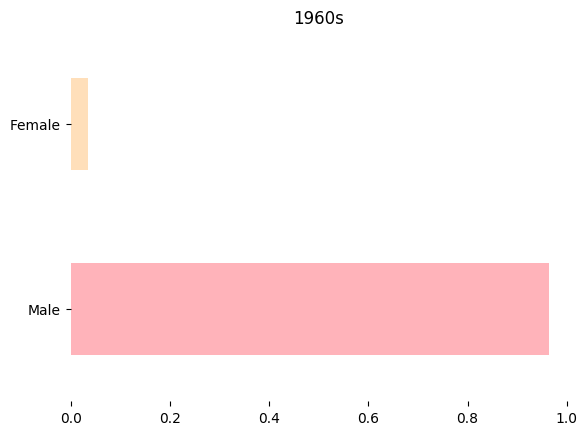

In [365]:
# 60s individual artists

ax = df_ind_60s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1960s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("60s_ind.png")

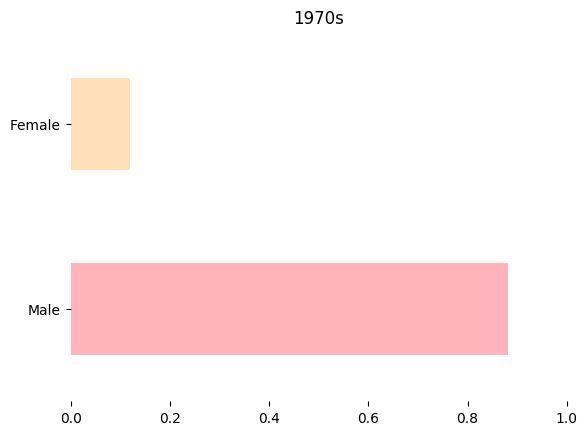

In [366]:
# 70s individual artists

ax = df_ind_70s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1970s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("70s_ind.png")

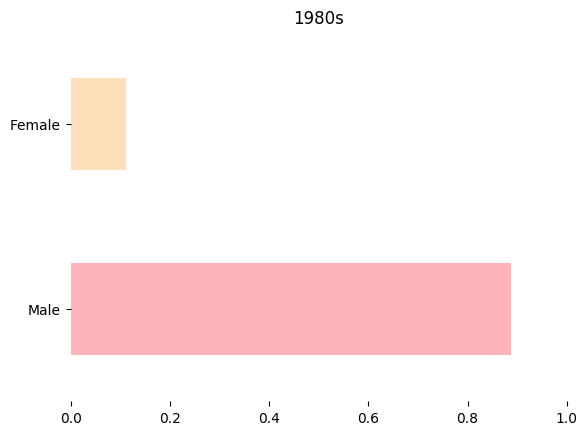

In [367]:
# 80s individual artists

ax = df_ind_80s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1980s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("80s_ind.png")

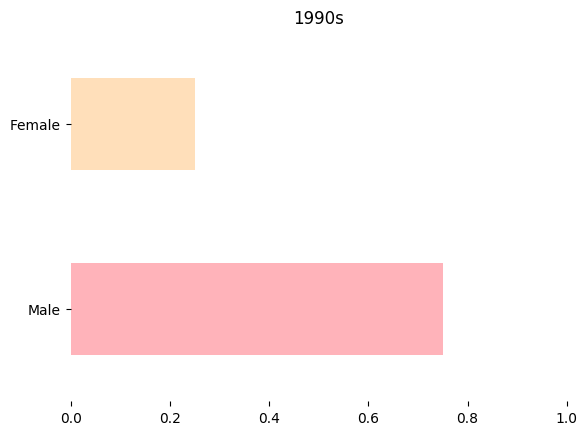

In [368]:
# 90s individual artists

ax = df_ind_90s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="1990s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("90s_ind.png")

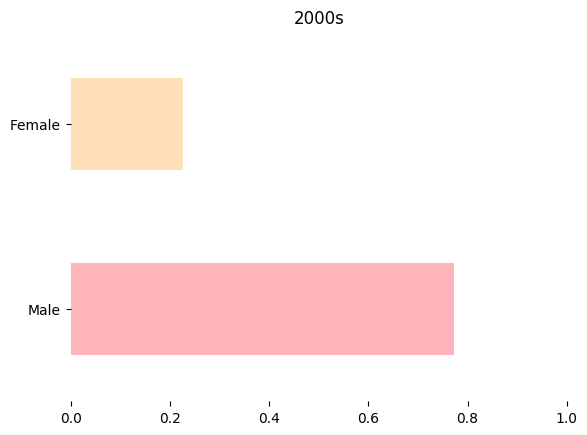

In [369]:
# 2000s individual artists

ax = df_ind_00s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="2000s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("00s_ind.png")

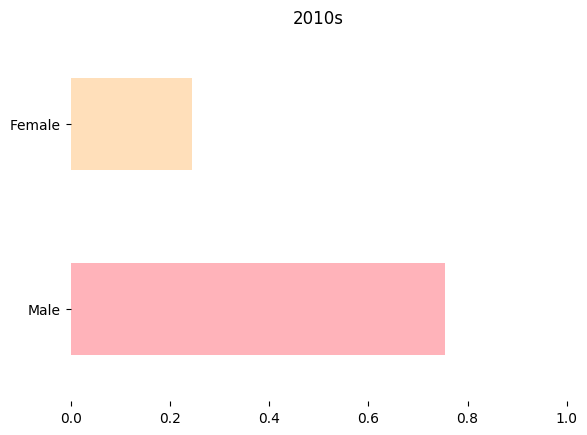

In [370]:
ax = df_ind_2010s.Gender.value_counts(normalize=True).head(2).plot(kind='barh', title="2010s")

ax.set_xlim(0, 1)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("2010s_ind.png")

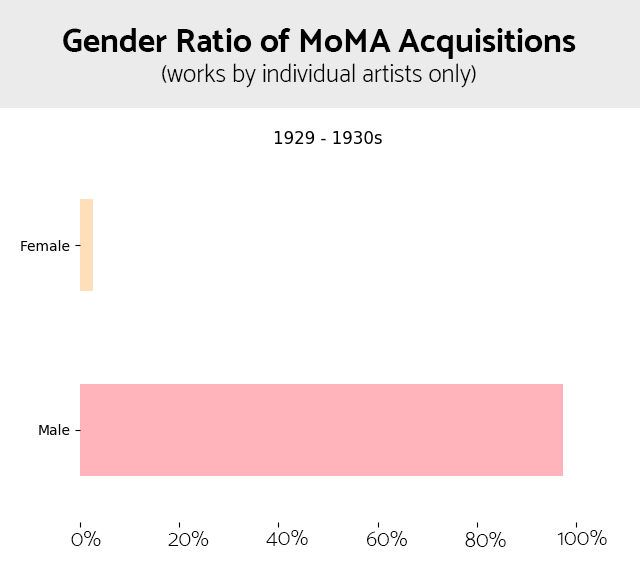

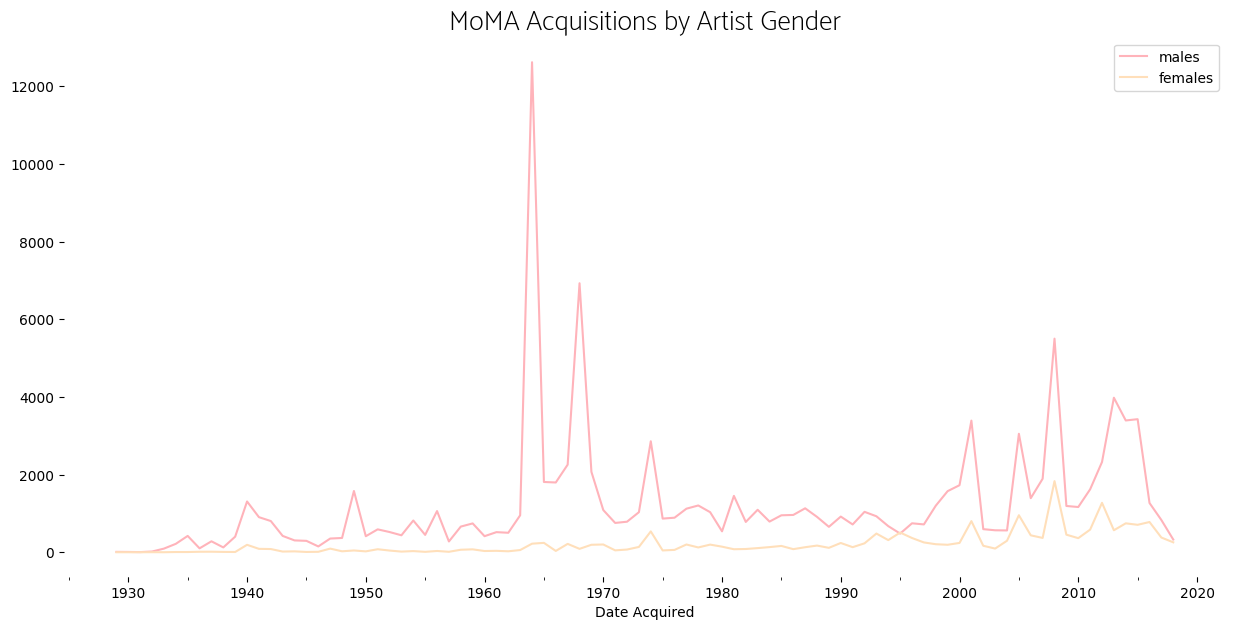

In [351]:
# plot number of times male and female artists appear in MoMA acquisitions (including appearances in group work) over time
ax = df.resample('A', on='DateAcquired').sum().plot(y=['males', 'females'], figsize=(15,7), title='MoMA Acquisitions by Artist Gender')
ax.set_xlabel("Date Acquired")

ax.title.set_fontsize(20)
ax.title.set_fontname('Catamaran')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("moma-gender-line-plot.pdf")

In [309]:
# why is there a big spike in what looks like 1964? see if MoMA acquired an unusual amount of work that year (yes)
df[(df['DateAcquired'] > '1964/01/01') & (df['DateAcquired'] < '1964/12/31')].DateAcquired.value_counts()

1964-10-06    11219
1964-01-07      344
1964-11-10      283
1964-04-14      217
1964-02-11      216
1964-06-15       92
1964-03-10       89
1964-05-12       35
1964-12-08       23
1964-01-04        3
1964-06-29        2
1964-06-26        1
1964-12-17        1
1964-06-30        1
1964-04-06        1
Name: DateAcquired, dtype: int64

In [320]:
# check if MoMA acquired bulk works by particular artists on that day
df[df['DateAcquired'] == '1964-10-06'].Artist.value_counts().head(10)

Marc Chagall        964
Pierre Bonnard      818
Pablo Picasso       692
Émile Bernard       624
Henri Matisse       533
André Derain        532
Raoul Dufy          507
Aristide Maillol    505
Georges Rouault     420
Maurice Denis       403
Name: Artist, dtype: int64

In [373]:
#1964 gender breakdown
df[(df['DateAcquired'] > '1964/01/01') & (df['DateAcquired'] < '1964/12/31')].Gender.value_counts().head(2)

Male      12223
Female      193
Name: Gender, dtype: int64

In [371]:
# looks like MoMA acquired about an equal number of works by men and women in 1995. check values
df[(df['DateAcquired'] > '1995/01/01') & (df['DateAcquired'] < '1995/12/31')].Gender.value_counts().head(2)

Female    499
Male      446
Name: Gender, dtype: int64

In [372]:
# did they acquire large quanities of work by any particular female artist? (yes!)
df[(df['DateAcquired'] > '1995/01/01') & (df['DateAcquired'] < '1995/12/31')].Artist.value_counts().head()

Dorothea Lange     342
Cindy Sherman       75
Lee Friedlander     71
Bernard Tschumi     55
Giuseppe Penone     34
Name: Artist, dtype: int64

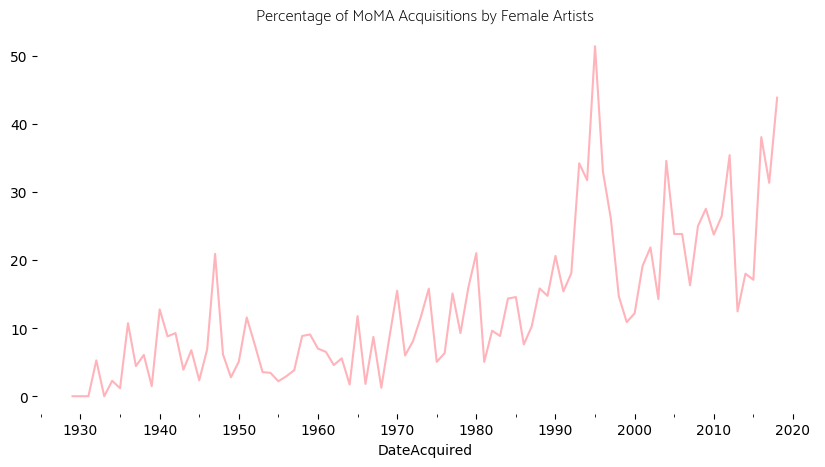

In [20]:
# hard to tell if there's a trend in acquiring works by female artists in the plot above
# plot just the percentage of works by female artists over time to see if there's an upward trend
df_resampled['mf_ratio'] = df_resampled.females / (df_resampled.males + df_resampled.females) * 100
ax = df_resampled.mf_ratio.plot(figsize=(10,5), title = "Percentage of MoMA Acquisitions by Female Artists")
ax.title.set_fontname('Catamaran')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("moma-female-line-plot.pdf")

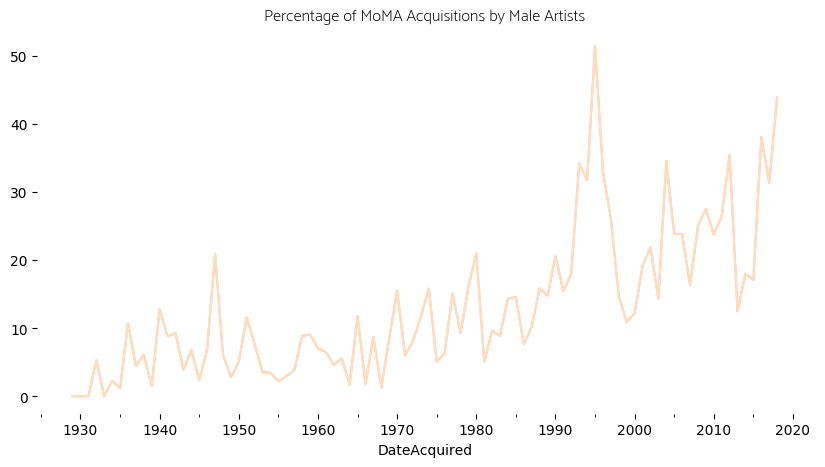

In [49]:
df_resampled['mf_ratio_2'] = df_resampled.males / (df_resampled.males + df_resampled.females) * 100
ax = df_resampled.mf_ratio.plot(figsize=(10,5), title = "Percentage of MoMA Acquisitions by Male Artists")
ax.title.set_fontname('Catamaran')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("moma-male-line-plot.pdf")
plt.show()

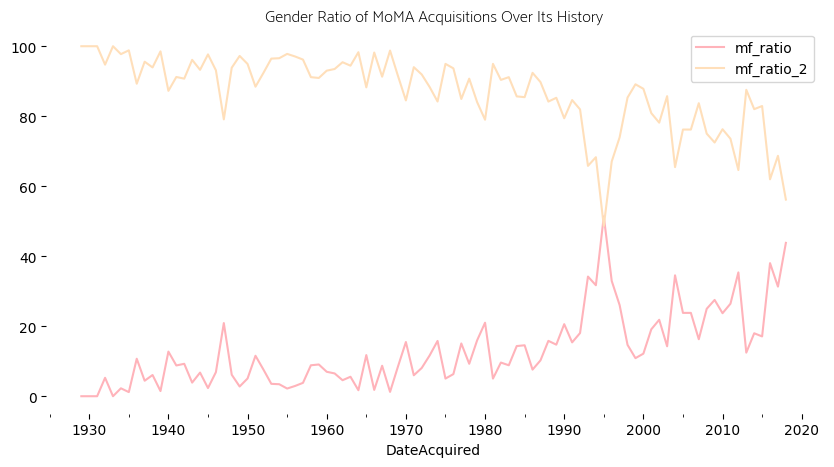

In [23]:
ax = df_resampled.plot(y=['mf_ratio', 'mf_ratio_2'], figsize=(10, 5), title="Gender Ratio of MoMA Acquisitions Over Its History")
ax.title.set_fontname('Catamaran')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("moma-gender-ratio-line-plot.pdf")
# to fix up in illustrator